## Data Set and Kaggle API

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#kaggle API and permits

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#load Dataset

!kaggle competitions download -c sberbank-russian-housing-market

  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 32.5MB/s]
 53% 9.00M/17.1M [00:00<00:00, 81.8MB/s]
100% 17.1M/17.1M [00:00<00:00, 108MB/s] 
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 63.5MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 26.4MB/s]
  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 72.8MB/s]


In [5]:
#unzipping files

!unzip sample_submission.csv.zip
!unzip macro.csv.zip
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  macro.csv.zip
  inflating: macro.csv               
Archive:  test.csv.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     
Archive:  train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [44]:
#importing libs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from nltk.metrics import edit_distance

In [45]:
#read CSV to Pandas DF

df_train = pd.read_csv('test.csv')

In [46]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 291 entries, id to market_count_5000
dtypes: float64(116), int64(159), object(16)
memory usage: 17.0+ MB


In [47]:
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,2.0,Investment,Perovo,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,no,0,2,7,yes,no,yes,yes,no,no,no,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1


In [48]:
#sort num and non-num columns

numeric_cols = df_train.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df_train.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000'],
      dtype='object', length=275)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


## Method #1: missing data (by columns) count & percentage



In [49]:
#missing data

df_train[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  7662 non-null   object
 1   product_type               7629 non-null   object
 2   sub_area                   7662 non-null   object
 3   culture_objects_top_25     7662 non-null   object
 4   thermal_power_plant_raion  7662 non-null   object
 5   incineration_raion         7662 non-null   object
 6   oil_chemistry_raion        7662 non-null   object
 7   radiation_raion            7662 non-null   object
 8   railroad_terminal_raion    7662 non-null   object
 9   big_market_raion           7662 non-null   object
 10  nuclear_reactor_raion      7662 non-null   object
 11  detention_facility_raion   7662 non-null   object
 12  water_1line                7662 non-null   object
 13  big_road1_1line            7662 non-null   object
 14  railroad

In [50]:
#missing data

df_train.isna().sum()

id                       0
timestamp                0
full_sq                  0
life_sq               1176
floor                    0
                      ... 
church_count_5000        0
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
Length: 291, dtype: int64

In [51]:
#save all col with missing data

num_missing = df_train.isna().sum()
num_missing[:20]   # look first 20

id                                      0
timestamp                               0
full_sq                                 0
life_sq                              1176
floor                                   0
max_floor                               0
material                                0
build_year                           1049
num_room                                0
kitch_sq                                0
state                                 694
product_type                           33
sub_area                                0
area_m                                  0
raion_popul                             0
green_zone_part                         0
indust_part                             0
children_preschool                      0
preschool_quota                      1596
preschool_education_centers_raion       0
dtype: int64

In [52]:
#missing data (in %)

df_train.isna().mean()

id                    0.000000
timestamp             0.000000
full_sq               0.000000
life_sq               0.153485
floor                 0.000000
                        ...   
church_count_5000     0.000000
mosque_count_5000     0.000000
leisure_count_5000    0.000000
sport_count_5000      0.000000
market_count_5000     0.000000
Length: 291, dtype: float64

In [53]:
#save all col with missing data in %

pct_missing = df_train.isna().mean()
pct_missing[:20]       # look first 20

id                                   0.000000
timestamp                            0.000000
full_sq                              0.000000
life_sq                              0.153485
floor                                0.000000
max_floor                            0.000000
material                             0.000000
build_year                           0.136909
num_room                             0.000000
kitch_sq                             0.000000
state                                0.090577
product_type                         0.004307
sub_area                             0.000000
area_m                               0.000000
raion_popul                          0.000000
green_zone_part                      0.000000
indust_part                          0.000000
children_preschool                   0.000000
preschool_quota                      0.208301
preschool_education_centers_raion    0.000000
dtype: float64

## Method #2: missing data (by columns) heatmap

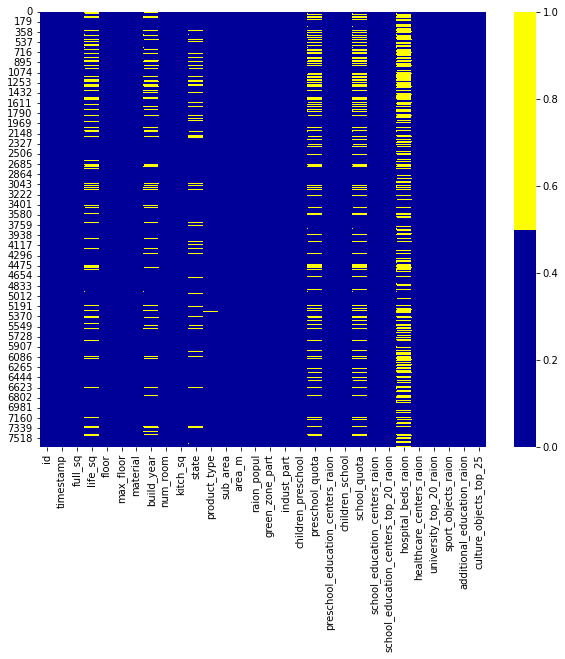

In [54]:
plt.figure(figsize=(10,8))

cols = df_train.columns[:30]   # look at 30 col
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df_train[cols].isna(), cmap=sns.color_palette(colours))

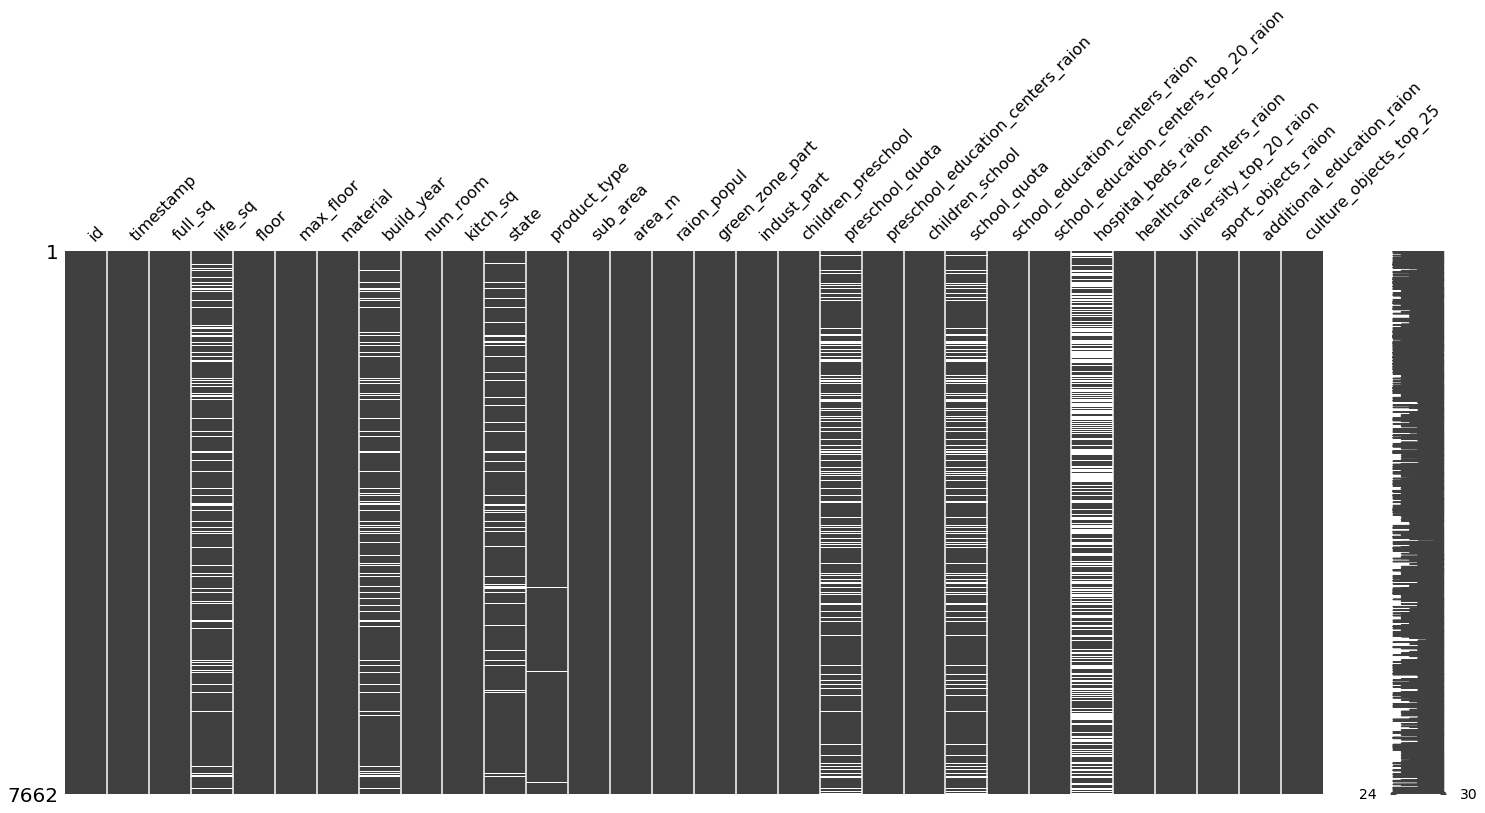

In [55]:
#The missingno library

msno.matrix(df_train.iloc[:, :30])

## Method #3: missing data (by rows) histogram

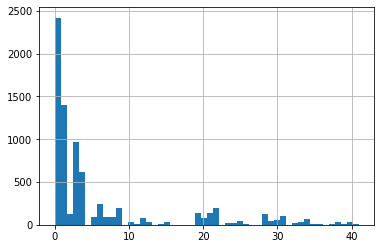

In [56]:
missing_by_row = df_train.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

# Technique #1: drop columns / features

In [57]:
#col with >30% missing data

pct_missing[pct_missing > .3]

hospital_beds_raion           0.446098
cafe_sum_500_min_price_avg    0.412294
cafe_sum_500_max_price_avg    0.412294
cafe_avg_price_500            0.412294
dtype: float64

In [58]:
#DF without more then 30% missing data col

df_less_missing_cols = df_train.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(7662, 287)

## Technique #2: drop rows / observations

In [59]:
#same technique like prev, but for rows

df_less_missing_rows = df_train[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(7537, 291)

## Technique #3: impute the missing with constant values

In [60]:
df_copy = df_train.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

# Technique #4: impute the missing with statistics

In [61]:
#num cols median fill

df_copy = df_train.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

In [62]:
#non-num cols most freq fill
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                              2016-01-25
product_type                           Investment
sub_area                     Poselenie Vnukovskoe
culture_objects_top_25                         no
thermal_power_plant_raion                      no
incineration_raion                             no
oil_chemistry_raion                            no
radiation_raion                                no
railroad_terminal_raion                        no
big_market_raion                               no
nuclear_reactor_raion                          no
detention_facility_raion                       no
water_1line                                    no
big_road1_1line                                no
railroad_1line                                 no
ecology                                      poor
Name: top, dtype: object

In [63]:
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

## Irregular data (outliers) Method #1: descriptive statistics

In [65]:
df_train.kurt(numeric_only=True)[:30]

id                                         -1.200000
full_sq                                    24.862863
life_sq                                   439.403998
floor                                       1.011424
max_floor                                   0.182939
material                                    1.160054
build_year                                  6.922715
num_room                                   22.799975
kitch_sq                                 4806.540273
state                                      -1.014863
area_m                                     17.111396
raion_popul                                -0.240850
green_zone_part                            -0.495037
indust_part                                 0.148699
children_preschool                          1.648196
preschool_quota                             4.771488
preschool_education_centers_raion           0.219240
children_school                             1.137281
school_quota                                4.

In [70]:
df_train['life_sq'].describe()

count    6486.000000
mean       32.660037
std        22.737855
min         0.000000
25%        19.900000
50%        30.400000
75%        41.800000
max       869.000000
Name: life_sq, dtype: float64

## Irregular data (outliers) Method #2: histogram & box plot

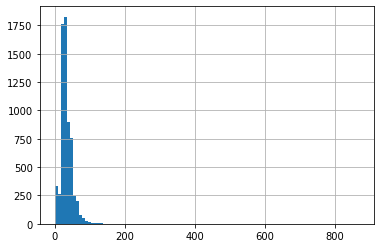

In [75]:
df_train['life_sq'].hist(bins=100)

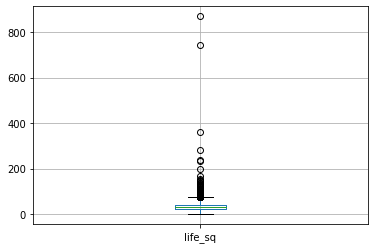

In [76]:
df_train.boxplot(column=['life_sq'])

## Irregular data (outliers) Method #3: bar chart

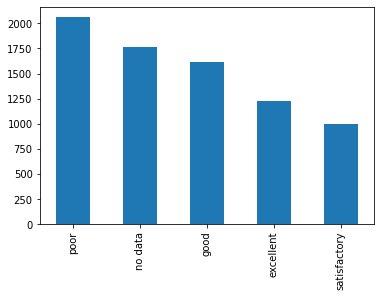

In [77]:
df_train['ecology'].value_counts().plot(kind='bar')

## Unnecessary type #1: repetitive & uninformative

In [84]:
#generate a list of columns with a high percentage of the same value

num_rows = len(df_train)

for col in df_train.columns:
    cnts = df_train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.99:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

oil_chemistry_raion: 99.15%
no     7597
yes      65
Name: oil_chemistry_raion, dtype: int64

mosque_count_500: 99.28%
0    7607
1      55
Name: mosque_count_500, dtype: int64



## Unnecessary type #2: irrelevant

Again, the data needs to provide valuable information for the project. If the features are not related to the question we are trying to solve, they are irrelevant.

How to find out?
We need to skim through the features to identify irrelevant ones. For example, a feature recording the temperature in the US wouldn’t provide direct insights into housing prices in Russia.

What to do?
When the features are not serving the project’s goal, we can remove them. You could use the drop method in pandas.

## Unnecessary type #3: duplicates

In [85]:
#type #1: all columns based

df_train[df_train.duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000


In [86]:
#If there were any duplicates

df_train.drop_duplicates()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,Investment,Perovo,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,no,0,2,7,yes,no,yes,yes,no,no,no,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,Investment,Kon'kovo,7.811375e+06,153248,0.127002,0.135650,7517,2627.0,5,7960,9650.0,5,0,350.0,3,0,11,3,no,0,11,6,no,no,no,yes,no,no,no,...,91,698.86,1181.82,940.34,3,20,35,25,7,1,0,2,15,1,1,20,4,30.34,4.66,44,1742694,52,1485126,307,696.58,1167.81,932.19,15,83,98,81,28,1,1,8,39,2,3,75,12
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,NaN,OwnerOccupier,Poselenie Desjonovskoe,5.299528e+07,13890,0.349935,0.011654,953,NaN,0,9

In [87]:
#type #2: key columns based

df_train[df_train.drop(columns=['id']).duplicated()]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000


In [89]:
#new data frame without duple

df_dedupped = df_train.drop(columns=['id']).drop_duplicates()

print(df_train.shape)
print(df_dedupped.shape)

#but no duple in data frame

(7662, 291)
(7662, 290)


In [94]:
#show the duplicated rows based on several columns

key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'area_m']

df_grouped = df_train.fillna(-999).groupby(key)['id'].count()

df_grouped[df_grouped > 1]

timestamp   full_sq  life_sq  floor  build_year  num_room  area_m      
2015-08-05  60.2     -999.0   2      -999.0      2         7.632940e+06    2
2015-09-21  54.2     -999.0   6      -999.0      2         2.553630e+07    2
2015-12-23  35.6     -999.0   5      -999.0      1         5.299528e+07    2
Name: id, dtype: int64

In [95]:
#drop these duplicates based on the subset of key columns


key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'area_m']
df_dedupped2 = df_train.drop_duplicates(subset=key)

print(df_train.shape)
print(df_dedupped2.shape)

(7662, 291)
(7659, 291)


## Inconsistent type #1: capitalization

In [97]:
#look at sub_area, which stores the name of different areas


df_train['sub_area'].value_counts(dropna=False)

#the text in this column looks standardized

Poselenie Vnukovskoe              584
Poselenie Sosenskoe               297
Solncevo                          285
Nagatinskij Zaton                 244
Poselenie Moskovskij              229
                                 ... 
Molzhaninovskoe                     1
Poselenie Krasnopahorskoe           1
Poselenie Mihajlovo-Jarcevskoe      1
Poselenie Kievskij                  1
Poselenie Marushkinskoe             1
Name: sub_area, Length: 145, dtype: int64

In [98]:
#lowercase (or uppercase) all letters


df_train['sub_area_lower'] = df_train['sub_area'].str.lower()
df_train['sub_area_lower'].value_counts(dropna=False)

poselenie vnukovskoe              584
poselenie sosenskoe               297
solncevo                          285
nagatinskij zaton                 244
poselenie moskovskij              229
                                 ... 
molzhaninovskoe                     1
poselenie krasnopahorskoe           1
poselenie mihajlovo-jarcevskoe      1
poselenie kievskij                  1
poselenie marushkinskoe             1
Name: sub_area_lower, Length: 145, dtype: int64

## Inconsistent type #2: data types

In [99]:
df_train['timestamp']

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-01
           ...    
7657    2016-05-26
7658    2016-05-28
7659    2016-05-30
7660    2016-05-30
7661    2016-05-30
Name: timestamp, Length: 7662, dtype: object

In [113]:
#convert the column to a DateTime format

df_train['timestamp_dt'] = pd.to_datetime(df_train['timestamp'], format='%Y-%m-%d')
df_train['year'] = pd.DatetimeIndex(df_train['timestamp_dt']).year
df_train['month'] = pd.DatetimeIndex(df_train['timestamp_dt']).month
df_train['weekday'] = pd.DatetimeIndex(df_train['timestamp_dt']).weekday

df_train[['timestamp_dt', 'year', 'month', 'weekday']].head()

,timestamp_dt,year,month,weekday
0,2015-07-01,2015,7,2
1,2015-07-01,2015,7,2
2,2015-07-01,2015,7,2
3,2015-07-01,2015,7,2
4,2015-07-01,2015,7,2


## Inconsistent type #3: typos of categorical values

A categorical column takes on a limited and usually fixed number of possible values. Sometimes it shows other values due to reasons like typos.

In [114]:
#generate a new DataFrame

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


#variable cities stores the 4 correct names

cities = ['toronto', 'vancouver', 'montreal', 'calgary']


#calculate the distance between the actual values and the correct values

for city in cities:
    df_city_ex[f'city_distance_{city}'] = df_city_ex['city'].map(lambda x: edit_distance(x, city))

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,torontoo,1,8,7,8
1,toronto,0,8,7,7
2,tronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancover,7,1,7,7
5,vancouvr,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


In [115]:
#set criteria to convert these typos to the correct values

msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver,city_distance_montreal,city_distance_calgary
0,toronto,1,8,7,8
1,toronto,0,8,7,7
2,toronto,1,8,6,7
3,vancouver,8,0,8,8
4,vancouver,7,1,7,7
5,vancouver,7,1,7,7
6,montreal,7,8,0,8
7,calgary,7,8,8,0


## Inconsistent type #4: addresses

In [116]:
#create a new dataset

df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


In [117]:
#lowercase the letters, remove leading and trailing white spaces, delete periods, standardize wordings


df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
